In [1]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
print("Sucessfully import our libraries")

Sucessfully import our libraries


In [2]:
#Load up our datasets

iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# process our data
x = iris_df.iloc[:,:].values

In [5]:
from sklearn.cluster import KMeans #Step 1: import k-means

km = KMeans()#Step 2: instantiate our model, by default we will have 8 clusters
km.fit(x)#Step 3: train our model, execute it!
print("Training is complete!")

Training is complete!


In [7]:
y_kmeans = km.predict(x)#Step 4: do our prediction to get cluster output
y_kmeans

array([7, 1, 1, 1, 7, 7, 1, 7, 1, 1, 7, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       1, 7, 1, 1, 7, 7, 7, 1, 1, 7, 7, 7, 1, 1, 7, 7, 1, 7, 7, 1, 1, 7,
       7, 1, 7, 1, 7, 1, 5, 5, 5, 2, 5, 2, 5, 3, 5, 2, 3, 2, 2, 5, 2, 5,
       2, 2, 5, 2, 6, 2, 6, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 6, 2, 5, 5, 5,
       2, 2, 2, 5, 2, 3, 2, 2, 2, 5, 3, 2, 4, 6, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 6, 4, 6, 6, 4, 4, 0, 0, 6, 4, 6, 0, 6, 4, 0, 6, 6, 4, 0, 0, 0,
       4, 6, 6, 0, 4, 4, 6, 4, 4, 4, 6, 4, 4, 4, 6, 4, 4, 6])

In [8]:
km.cluster_centers_

array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [5.62857143, 2.72380952, 4.13333333, 1.2952381 ],
       [5.24285714, 2.37142857, 3.44285714, 1.02857143],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [5.24285714, 3.66785714, 1.5       , 0.28214286]])

Text(0, 0.5, 'Sepal width in cm')

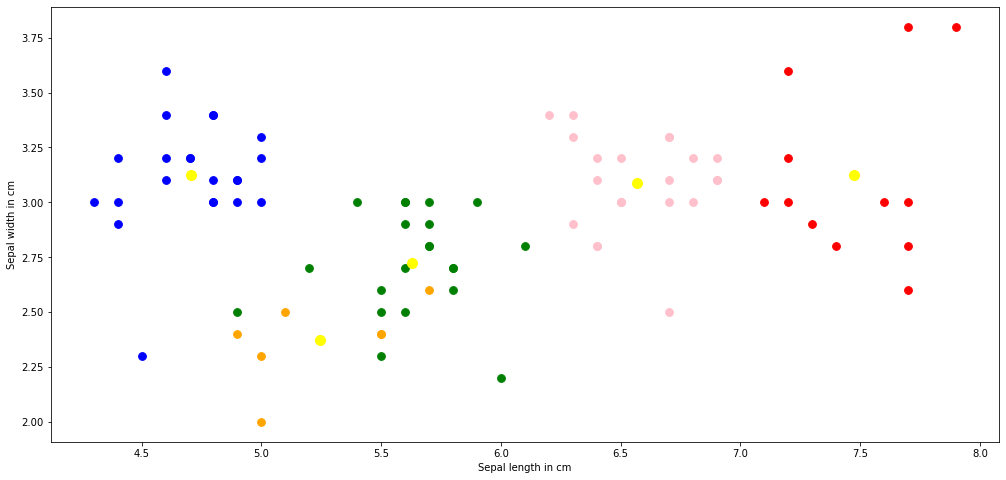

In [9]:
#to visualise our clusters we are going to use a 2d plot
#scatterplot

plt.figure(figsize=(17,8)) #make our plot area bigger

#plot each individual clusters, using sepal length and sepal width, 0 and 1
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans==0, 1],s=60, c="red")
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans==1, 1],s=60, c="blue")
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans==2, 1],s=60, c="green")
plt.scatter(x[y_kmeans == 3, 0],x[y_kmeans==3, 1],s=60, c="orange")
plt.scatter(x[y_kmeans == 4, 0],x[y_kmeans==4, 1],s=60, c="pink")


#we have to plot our centriods
plt.scatter(km.cluster_centers_[:5,0], km.cluster_centers_[:5,1], 
            s=100, c="yellow")

plt.xlabel("Sepal length in cm")
plt.ylabel("Sepal width in cm")

In [10]:
#to track and save all the cluster's inertia we need a way to save it.
wcss = [] # we define an list called wcss - short within cluster sum of square


#we then want a way to test out all the different K's of clustering and obtain 
#out the inertia amounts.

for i in range(1,11):
    km = KMeans(n_clusters=i) #Step 2: instantiate our model
    km.fit(x) #step 3: fit and train our model
    wcss.append(km.inertia_) #save our inertia values to our list

Text(0, 0.5, 'WCSS - Within cluster sum of squares')

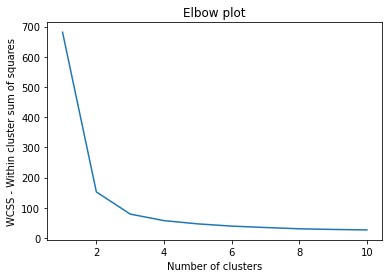

In [11]:
#after having saved all our inertia values we can plot our elbow plot!
plt.plot(range(1,11), wcss)#this gives us a line plot
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS - Within cluster sum of squares")

In [12]:
km = KMeans(n_clusters=3)
km.fit(x)

y_kmeans = km.predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0, 0.5, 'Sepal width in cm')

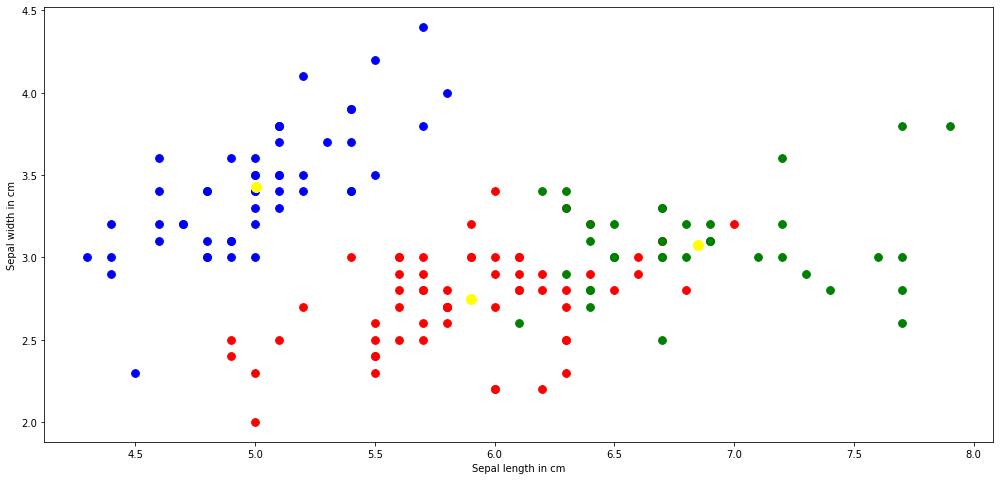

In [13]:
plt.figure(figsize=(17,8))

plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans==0, 1],s=60, c="red")
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans==1, 1],s=60, c="blue")
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans==2, 1],s=60, c="green")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
            s=100, c="yellow")

plt.xlabel("Sepal length in cm")
plt.ylabel("Sepal width in cm")